# **Exploratory Data Analysis**

---
---

**Data dictionary & problem description:**

Problem: predicting, based on measurements of contaminants collected over a year, whether it may be harmful to health or not.

- FECHA. Date recorded at the time of taking pollutant values (numeric)
- N_CCAA. Name of each autonomous community in Spain where measurement data for each pollutant has been collected (categorical)
- PROVINCIA. Name of each province where measurement data for each pollutant has been collected (categorical)
- N_MUNICIPIO. Name of each municipality where measurement data for each pollutant has been collected (categorical)
- ESTACION. Number assigned to each station of each autonomous community that has recorded pollutant measurement data (numeric)
- MAGNITUD. Each pollutant that has been recorded in the different stations (categorical)
- LATITUD, LONGITUD. Geographic data of each station where the pollutants have been recorded (numeric)
- H01, H02, H03... H24. Recorded value per hour of each pollutant. All contaminants have been taken with unified measurement units (µg/m3)(numeric)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [20]:
pd.set_option('display.max_columns', None) 

In [21]:
clean_df = pd.read_csv('../data/processed/clean_pollutants.csv')
clean_df.head()

,FECHA,N_CCAA,PROVINCIA,N_MUNICIPIO,ESTACION,MAGNITUD,TIPO_AREA,TIPO_ESTACION,LATITUD,LONGITUD,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,2022-01-04,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.16,0.16,0.18,0.18,0.14,0.15,0.22,0.18,0.16,0.18,0.18,0.13,0.17,0.11,0.17,0.18,0.19,0.25,0.25,0.28,0.25,0.20,0.20,0.22
1,2022-01-05,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.23,0.26,0.22,0.20,0.21,0.23,0.28,0.31,0.34,0.40,0.35,0.29,0.27,0.30,0.48,0.33,0.45,0.58,0.57,0.51,0.51,0.51,0.48,0.41
2,2022-01-06,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.36,0.31,0.32,0.33,0.32,0.33,0.33,0.37,0.54,0.45,0.37,0.32,0.30,0.28,0.30,0.26,0.29,0.36,0.43,0.32,0.32,0.30,0.30,0.28
3,2022-01-07,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.25,0.24,0.25,0.26,0.32,0.32,0.28,0.25,0.30,0.27,0.30,0.39,0.28,0.23,0.28,0.29,0.28,0.32,0.31,0.23,0.25,0.29,0.29,0.28
4,2022-01-08,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.25,0.25,0.23,0.23,0.32,0.29,0.23,0.28,0.55,0.34,0.36,0.28,0.27,0.27,0.25,0.20,0.23,0.25,0.25,0.23,0.20,0.22,0.22,0.19


In [22]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719282 entries, 0 to 719281
Data columns (total 34 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   FECHA          719282 non-null  object 
 1   N_CCAA         718259 non-null  object 
 2   PROVINCIA      719282 non-null  object 
 3   N_MUNICIPIO    718259 non-null  object 
 4   ESTACION       719282 non-null  int64  
 5   MAGNITUD       719282 non-null  object 
 6   TIPO_AREA      715747 non-null  object 
 7   TIPO_ESTACION  715747 non-null  object 
 8   LATITUD        715747 non-null  float64
 9   LONGITUD       715747 non-null  float64
 10  H01            719282 non-null  float64
 11  H02            719282 non-null  float64
 12  H03            719282 non-null  float64
 13  H04            719282 non-null  float64
 14  H05            719282 non-null  float64
 15  H06            719282 non-null  float64
 16  H07            719282 non-null  float64
 17  H08            719282 non-nul

### **1. Define the Target**

In [23]:
# Lista de columnas de las cuales quieres calcular la media
columnas_h = [col for col in clean_df.columns if col.startswith('H')]

# Calcular la media de esas columnas para cada fila
clean_df['Media_Diaria'] = clean_df[columnas_h].mean(axis=1)
clean_df

,FECHA,N_CCAA,PROVINCIA,N_MUNICIPIO,ESTACION,MAGNITUD,TIPO_AREA,TIPO_ESTACION,LATITUD,LONGITUD,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24,Media_Diaria
0,2022-01-04,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.16,0.16,0.18,0.18,0.14,0.15,0.22,0.18,0.16,0.18,0.18,0.13,0.17,0.11,0.17,0.18,0.19,0.25,0.25,0.28,0.25,0.20,0.20,0.22,0.187083
1,2022-01-05,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.23,0.26,0.22,0.20,0.21,0.23,0.28,0.31,0.34,0.40,0.35,0.29,0.27,0.30,0.48,0.33,0.45,0.58,0.57,0.51,0.51,0.51,0.48,0.41,0.363333
2,2022-01-06,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.36,0.31,0.32,0.33,0.32,0.33,0.33,0.37,0.54,0.45,0.37,0.32,0.30,0.28,0.30,0.26,0.29,0.36,0.43,0.32,0.32,0.30,0.30,0.28,0.337083
3,2022-01-07,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.25,0.24,0.25,0.26,0.32,0.32,0.28,0.25,0.30,0.27,0.30,0.39,0.28,0.23,0.28,0.29,0.28,0.32,0.31,0.23,0.25,0.29,0.29,0.28,0.281667
4,2022-01-08,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.25,0.25,0.23,0.23,0.32,0.29,0.23,0.28,0.55,0.34,0.36,0.28,0.27,0.27,0.25,0.20,0.23,0.25,0.25,0.23,0.20,0.22,0.22,0.19,0.266250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719277,2022-12-13,CEUTA,CEUTA,CEUTA,1,SO2,URBANA,FONDO,35.8930,-5.3147,1.53,1.33,1.58,1.41,1.43,2.88,1.76,1.51,1.42,1.44,1.55,1.41,1.65,1.88,2.22,2.43,3.32,6.62,19.11,17.15,8.29,29.35,24.51,24.16,6.664167
719278,2022-12-16,CEUTA,CEUTA,CEUTA,1,SO2,URBANA,FONDO,35.8930,-5.3147,1.64,1.50,1.47,1.44,1.58,1.38,1.12,1.22,1.46,1.18,1.37,2.75,8.84,15.18,15.03,25.54,12.58,38.78,17.84,8.01,11.66,3.28,5.70,5.62,7.757083
719279,2022-12-25,CEUTA,CEUTA,CEUTA,1,SO2,URBANA,FONDO,35.8930,-5.3147,2.30,2.15,2.17,2.05,1.82,1.74,1.85,2.48,2.71,3.53,3.34,2.98,2.99,2.44,2.72,2.27,2.07,2.00,1.79,1.65,1.68,1.39,1.30,1.28,2.195833
719280,2022-12-26,CEUTA,CEUTA,CEUTA,1,SO2,URBANA,FONDO,35.8930,-5.3147,1.40,1.22,1.22,1.11,1.04,1.16,1.15,1.23,1.18,1.43,1.65,1.91,2.09,2.99,3.31,3.77,2.82,2.47,2.79,2.77,2.66,2.51,2.42,2.52,2.034167


In [24]:
# Función para clasificar los valores de peligrosidad de cada contaminante
def clasificar_peligrosidad(valor, umbrales):
    if valor < umbrales['bajo']:
        return 'Baja'
    elif valor < umbrales['alto']:
        return 'Media'
    else:
        return 'Alta'

# Aplicar la función a cada fila del DataFrame
def clasificar_fila(row):
    contaminante = row['MAGNITUD']
    valor = row['Media_Diaria']
    if contaminante in umbrales_peligrosidad:
        return clasificar_peligrosidad(valor, umbrales_peligrosidad[contaminante])
    
umbrales_peligrosidad = {
    'SO2': {'bajo': 25, 'alto': 40},
    'CO': {'bajo': 2, 'alto': 4},
    'C6H6': {'bajo': 2, 'alto': 5},
    'NO2': {'bajo': 15, 'alto': 25},
    'PM2.5': {'bajo': 10, 'alto': 15},
    'PM10': {'bajo': 25, 'alto': 45}, 
    'NOX': {'bajo': 75, 'alto': 100},
    'O3': {'bajo': 75, 'alto': 100}
}

clean_df['Peligrosidad'] = clean_df.apply(clasificar_fila, axis=1)

clean_df

,FECHA,N_CCAA,PROVINCIA,N_MUNICIPIO,ESTACION,MAGNITUD,TIPO_AREA,TIPO_ESTACION,LATITUD,LONGITUD,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24,Media_Diaria,Peligrosidad
0,2022-01-04,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.16,0.16,0.18,0.18,0.14,0.15,0.22,0.18,0.16,0.18,0.18,0.13,0.17,0.11,0.17,0.18,0.19,0.25,0.25,0.28,0.25,0.20,0.20,0.22,0.187083,Baja
1,2022-01-05,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.23,0.26,0.22,0.20,0.21,0.23,0.28,0.31,0.34,0.40,0.35,0.29,0.27,0.30,0.48,0.33,0.45,0.58,0.57,0.51,0.51,0.51,0.48,0.41,0.363333,Baja
2,2022-01-06,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.36,0.31,0.32,0.33,0.32,0.33,0.33,0.37,0.54,0.45,0.37,0.32,0.30,0.28,0.30,0.26,0.29,0.36,0.43,0.32,0.32,0.30,0.30,0.28,0.337083,Baja
3,2022-01-07,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.25,0.24,0.25,0.26,0.32,0.32,0.28,0.25,0.30,0.27,0.30,0.39,0.28,0.23,0.28,0.29,0.28,0.32,0.31,0.23,0.25,0.29,0.29,0.28,0.281667,Baja
4,2022-01-08,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.25,0.25,0.23,0.23,0.32,0.29,0.23,0.28,0.55,0.34,0.36,0.28,0.27,0.27,0.25,0.20,0.23,0.25,0.25,0.23,0.20,0.22,0.22,0.19,0.266250,Baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719277,2022-12-13,CEUTA,CEUTA,CEUTA,1,SO2,URBANA,FONDO,35.8930,-5.3147,1.53,1.33,1.58,1.41,1.43,2.88,1.76,1.51,1.42,1.44,1.55,1.41,1.65,1.88,2.22,2.43,3.32,6.62,19.11,17.15,8.29,29.35,24.51,24.16,6.664167,Baja
719278,2022-12-16,CEUTA,CEUTA,CEUTA,1,SO2,URBANA,FONDO,35.8930,-5.3147,1.64,1.50,1.47,1.44,1.58,1.38,1.12,1.22,1.46,1.18,1.37,2.75,8.84,15.18,15.03,25.54,12.58,38.78,17.84,8.01,11.66,3.28,5.70,5.62,7.757083,Baja
719279,2022-12-25,CEUTA,CEUTA,CEUTA,1,SO2,URBANA,FONDO,35.8930,-5.3147,2.30,2.15,2.17,2.05,1.82,1.74,1.85,2.48,2.71,3.53,3.34,2.98,2.99,2.44,2.72,2.27,2.07,2.00,1.79,1.65,1.68,1.39,1.30,1.28,2.195833,Baja
719280,2022-12-26,CEUTA,CEUTA,CEUTA,1,SO2,URBANA,FONDO,35.8930,-5.3147,1.40,1.22,1.22,1.11,1.04,1.16,1.15,1.23,1.18,1.43,1.65,1.91,2.09,2.99,3.31,3.77,2.82,2.47,2.79,2.77,2.66,2.51,2.42,2.52,2.034167,Baja


In [25]:
# Agrupar por 'Peligrosidad' y obtener estadísticas para 'magnitud'
stats_magnitud = clean_df.groupby('Peligrosidad')['MAGNITUD'].describe()
stats_magnitud

,count,unique,top,freq
Peligrosidad,,,,
Alta,43088,7,NO2,23362
Baja,579460,8,SO2,129740
Media,96734,8,NO2,32300


In [26]:
# Remove time columns
columnas_h = [column for column in clean_df.columns if 'H' in column]

clean_df = clean_df.drop(columnas_h, axis=1)

In [27]:
clean_df = clean_df.drop('ESTACION', axis=1)
clean_df

,N_CCAA,PROVINCIA,N_MUNICIPIO,MAGNITUD,TIPO_AREA,TIPO_ESTACION,LATITUD,LONGITUD,Media_Diaria,Peligrosidad
0,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.187083,Baja
1,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.363333,Baja
2,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.337083,Baja
3,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.281667,Baja
4,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,C6H6,URBANA,TRAFICO,42.8548,-2.6807,0.266250,Baja
...,...,...,...,...,...,...,...,...,...,...
719277,CEUTA,CEUTA,CEUTA,SO2,URBANA,FONDO,35.8930,-5.3147,6.664167,Baja
719278,CEUTA,CEUTA,CEUTA,SO2,URBANA,FONDO,35.8930,-5.3147,7.757083,Baja
719279,CEUTA,CEUTA,CEUTA,SO2,URBANA,FONDO,35.8930,-5.3147,2.195833,Baja
719280,CEUTA,CEUTA,CEUTA,SO2,URBANA,FONDO,35.8930,-5.3147,2.034167,Baja


### **2. Análisis univariante**

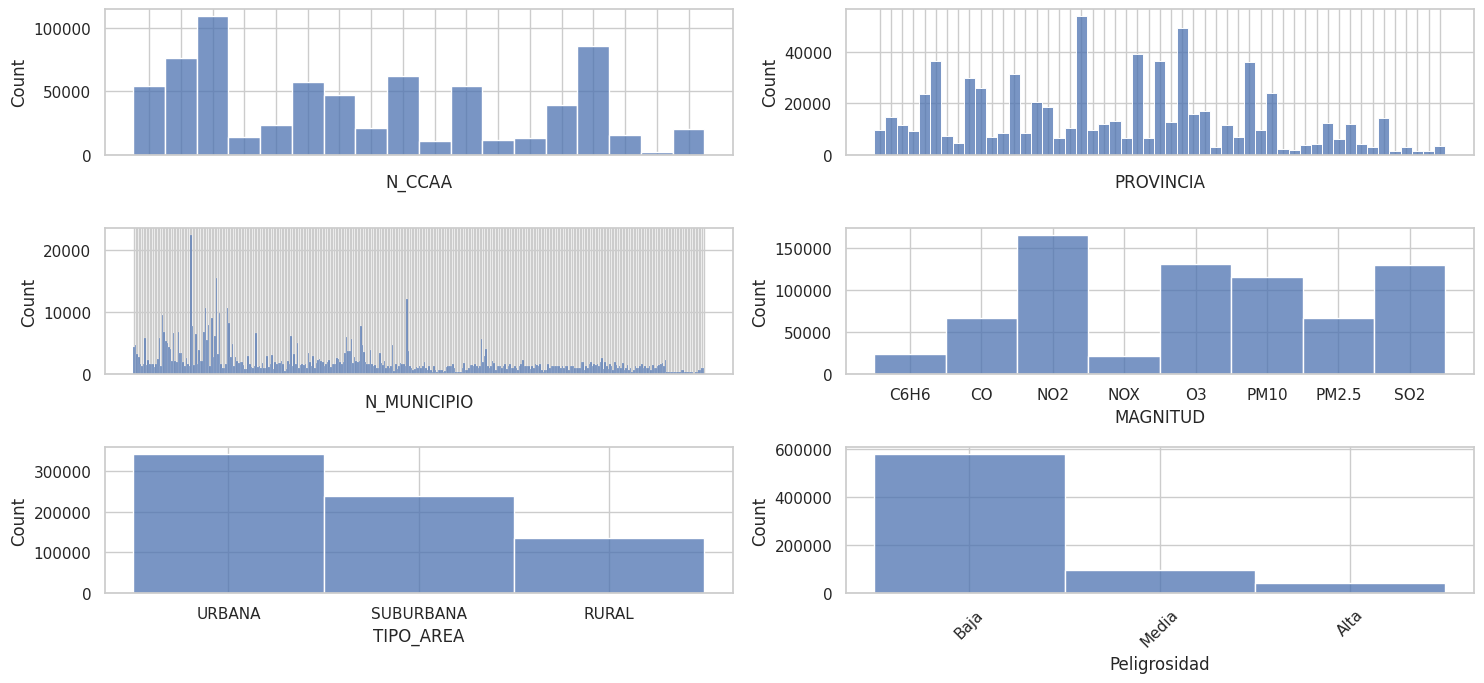

In [46]:
# Histogramas para visualizar la distribución de datos en las columnas "N_CCAA", "PROVINCIA", "N_MUNICIPIO", "MAGNITUD", "TIPO_AREA", "Peligrosidad" 
sns.set(style= 'whitegrid')

fig, axis = plt.subplots(3, 2, figsize=(15, 7))

# Histogramas
sns.histplot(ax=axis[0, 0], data=clean_df, x= 'N_CCAA').set_xticklabels([])
sns.histplot(ax=axis[0, 1], data=clean_df, x= 'PROVINCIA').set_xticklabels([])
sns.histplot(ax=axis[1, 0], data=clean_df, x= 'N_MUNICIPIO').set_xticklabels([])
sns.histplot(ax=axis[1, 1], data=clean_df, x= 'MAGNITUD')
sns.histplot(ax=axis[2, 0], data=clean_df, x= 'TIPO_AREA')
sns.histplot(ax=axis[2, 1], data=clean_df, x= 'Peligrosidad')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

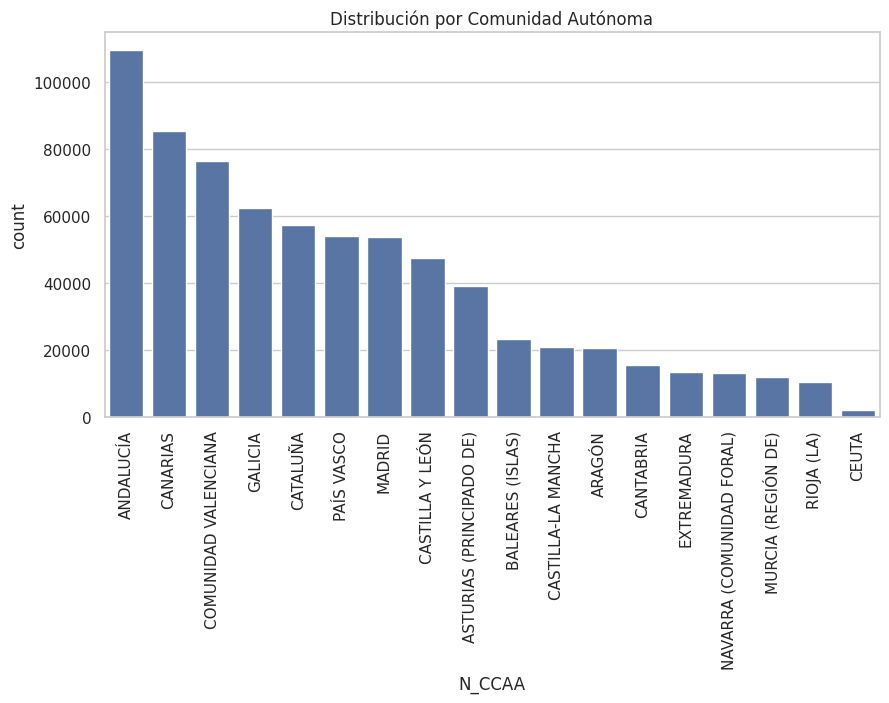

In [29]:
# Distribución de datos en la columna 'N_CCAA', con las Comunidades Autónomas ordenadas por frecuencia en orden descendente en el eje x. 
# Proporciona una visualización de cuántas veces aparece cada provincia en tus datos.
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))

sns.countplot(data=clean_df, x='N_CCAA', order = clean_df['N_CCAA'].value_counts().index)

plt.title('Distribución por Comunidad Autónoma')
plt.xticks(rotation=90)
plt.show()


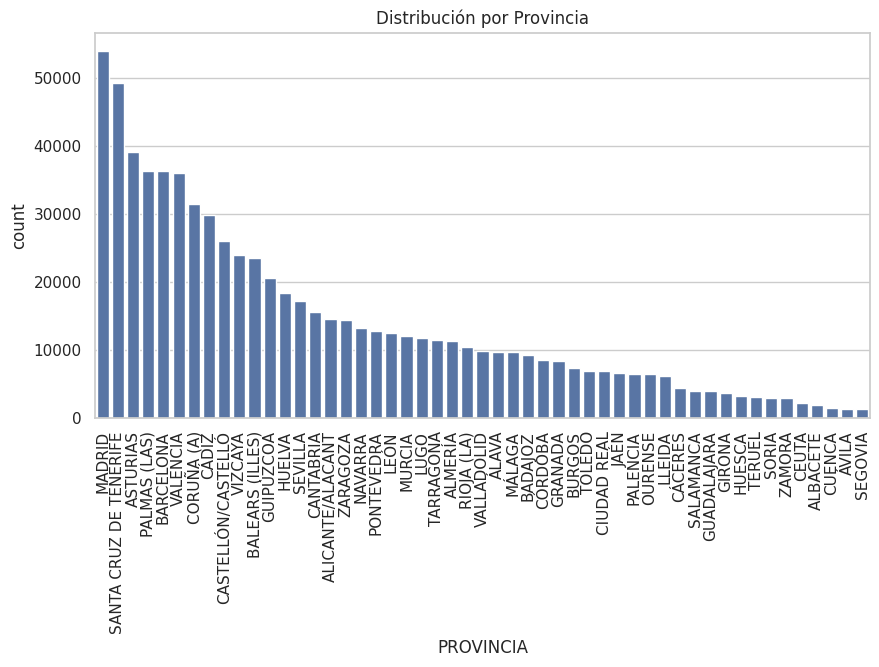

In [30]:
# Distribución de datos en la columna 'PROVINCIA', con las provincias ordenadas por frecuencia en orden descendente en el eje x. 
# Proporciona una visualización de cuántas veces aparece cada provincia en tus datos.
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))

sns.countplot(data=clean_df, x='PROVINCIA', order = clean_df['PROVINCIA'].value_counts().index)

plt.title('Distribución por Provincia')
plt.xticks(rotation=90)
plt.show()


### **2. Multivariate Analysis**

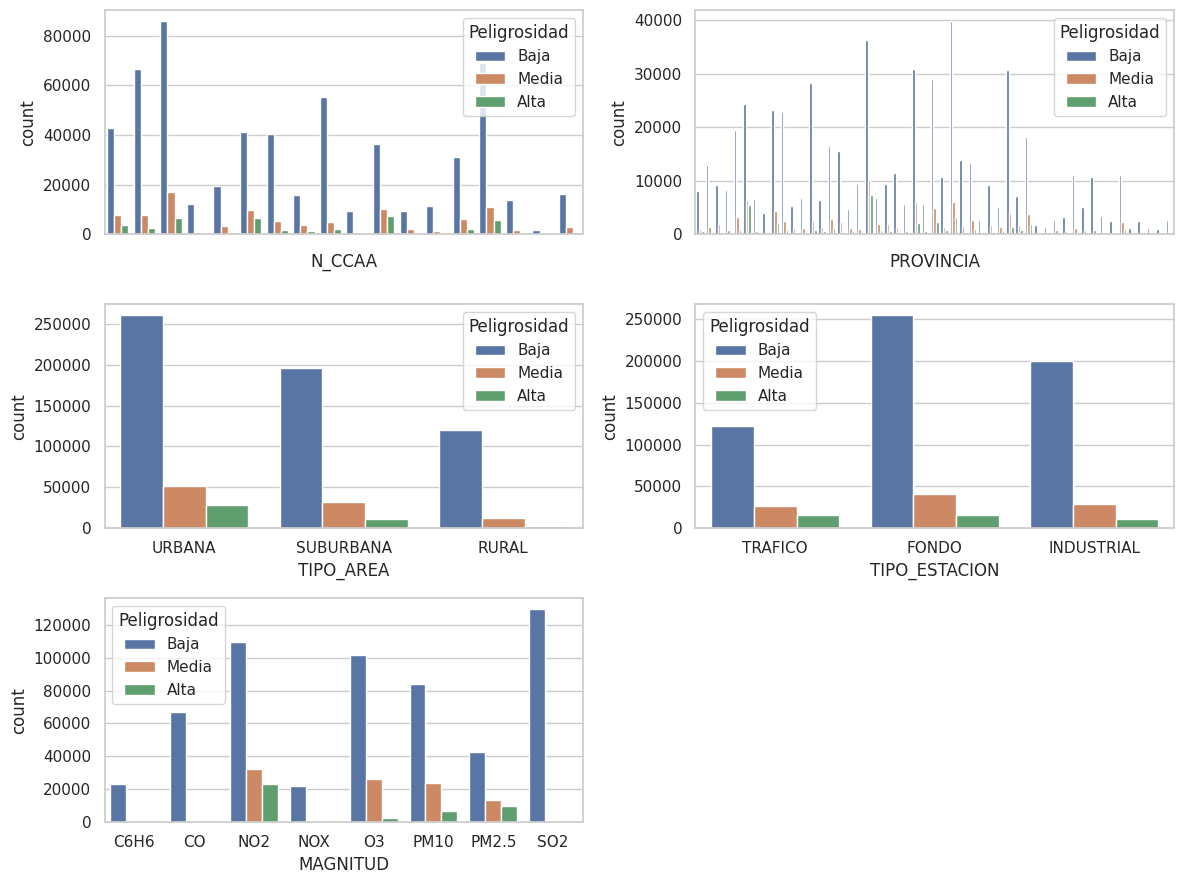

In [38]:
# Análisis Categórico-categórico
fig, axis = plt.subplots(3, 2, figsize = (12, 9))

sns.countplot(ax = axis[0, 0], data = clean_df, x = 'N_CCAA', hue = 'Peligrosidad').set_xticklabels([])
sns.countplot(ax = axis[0, 1], data = clean_df, x = 'PROVINCIA', hue = 'Peligrosidad').set_xticklabels([])
sns.countplot(ax = axis[1, 0], data = clean_df, x = 'TIPO_AREA', hue = 'Peligrosidad')
sns.countplot(ax = axis[1, 1], data = clean_df, x = 'TIPO_ESTACION', hue = 'Peligrosidad')
sns.countplot(ax = axis[2, 0], data = clean_df, x = 'MAGNITUD', hue = 'Peligrosidad')

fig.delaxes(axis[2, 1])

plt.tight_layout()
plt.show()

In [49]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719282 entries, 0 to 719281
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   N_CCAA         718259 non-null  object 
 1   PROVINCIA      719282 non-null  object 
 2   N_MUNICIPIO    718259 non-null  object 
 3   MAGNITUD       719282 non-null  object 
 4   TIPO_AREA      715747 non-null  object 
 5   TIPO_ESTACION  715747 non-null  object 
 6   LATITUD        715747 non-null  float64
 7   LONGITUD       715747 non-null  float64
 8   Media_Diaria   719282 non-null  float64
 9   Peligrosidad   719282 non-null  object 
dtypes: float64(3), object(7)
memory usage: 54.9+ MB


ValueError: could not convert string to float: 'PAÍS VASCO'

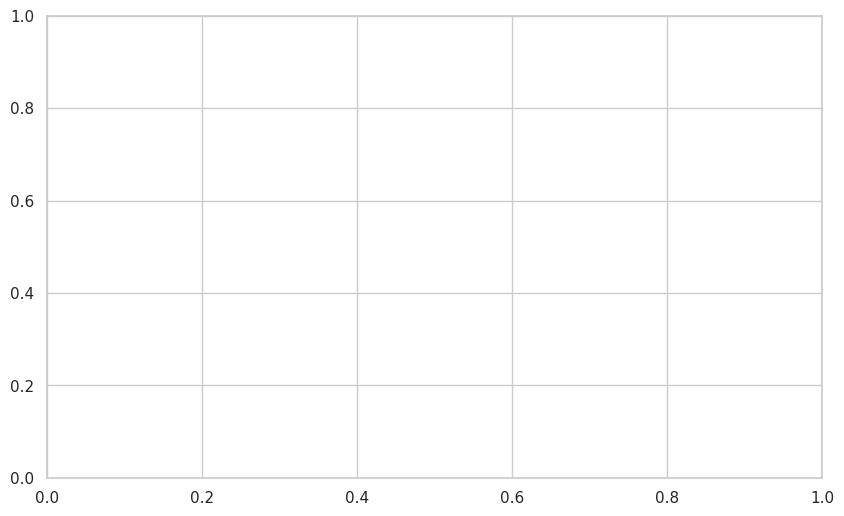

In [50]:
# Correlation map
fig, axis = plt.subplots(figsize = (10, 6))
sns.heatmap(clean_df[["N_CCAA", "PROVINCIA", "N_MUNICIPIO", "MAGNITUD", "TIPO_AREA", "TIPO_ESTACION", "Media_Diaria", "Peligrosidad"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()
